In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization
from plotly.offline import init_notebook_mode, plot,iplot

init_notebook_mode(connected=True)

datadir = os.path.join('.','data2020', 'players_20.csv')

# Curación

## Curacion de los datos (variables de soporte)



El objetivo de esta primer notebook es la visualización y curación de los datos a utilizar, preparándolos para un posterior análisis y uso.
A continuación se adjunta link a la página donde se describen todas y cada una de las features que conforman el dataset.

Explicacion de las [features](https://www.fifauteam.com/fifa-20-attributes-guide/)

En esta primera etapa se crea una lista de las variables del dataset a considerar para la curación, análisis y posterior uso.

In [2]:
#######################################################################
cols2keep = list()

# Features generales
cols2keep.append('short_name')
cols2keep.append('club')
cols2keep.append('height_cm')
cols2keep.append('weight_kg')
cols2keep.append('overall')
cols2keep.append('player_positions')
cols2keep.append('preferred_foot')
cols2keep.append('work_rate')
cols2keep.append('team_position')
cols2keep.append('shooting')
cols2keep.append('passing')
cols2keep.append('dribbling')
cols2keep.append('defending')
cols2keep.append('physic')

# Features relativas a un arquero
cols2keep.append('goalkeeping_diving')
cols2keep.append('goalkeeping_handling')
cols2keep.append('goalkeeping_kicking')
cols2keep.append('goalkeeping_reflexes')
cols2keep.append('goalkeeping_positioning')

# Features relativas a la capacidad de ataque
cols2keep.append('attacking_crossing')
cols2keep.append('attacking_finishing')
cols2keep.append('attacking_heading_accuracy')
cols2keep.append('attacking_short_passing')
cols2keep.append('attacking_volleys')

# Features relativas a las habilidades
cols2keep.append('skill_moves')
cols2keep.append('skill_dribbling')
cols2keep.append('skill_curve')
cols2keep.append('skill_fk_accuracy')
cols2keep.append('skill_long_passing')
cols2keep.append('skill_ball_control')

# Features relativas a la movilidad
cols2keep.append('movement_acceleration')
cols2keep.append('movement_sprint_speed')
cols2keep.append('movement_agility')
cols2keep.append('movement_reactions')
cols2keep.append('movement_balance')

# Features relativas a la potencia
cols2keep.append('power_shot_power')
cols2keep.append('power_jumping')
cols2keep.append('power_stamina')
cols2keep.append('power_strength')
cols2keep.append('power_long_shots')

# Features relativas a las soft skills
cols2keep.append('mentality_aggression')
cols2keep.append('mentality_interceptions')
cols2keep.append('mentality_positioning')
cols2keep.append('mentality_vision')
cols2keep.append('mentality_penalties')
cols2keep.append('mentality_composure')

# Features relativas a la defensa
cols2keep.append('defending_marking')
cols2keep.append('defending_standing_tackle')
cols2keep.append('defending_sliding_tackle')

Luego se define una lista con aquellas columnas que posean campos con valores NaN para luego ser curadas.

In [3]:
#######################################################################
# Columnas con campos en NaN
cols2fix = list()
cols2fix.append('shooting')
cols2fix.append('passing')
cols2fix.append('dribbling')
cols2fix.append('defending')
cols2fix.append('physic')

En el siguiente bloque se define un diccionario para transformar los valores de la columna "work_rate" de texto a numéricos para poder procesarlos posteriormente.

In [4]:
# Regla de transformacion de work_rate
regla = dict()
regla['High/High'] = 4
regla['High/Medium'] = 3
regla['High/Low'] = 2
regla['Medium/High'] = 1 
regla['Medium/Medium'] = 0
regla['Medium/Low'] = -1
regla['Low/High'] = -2
regla['Low/Medium'] = -3
regla['Low/Low'] = -4

## Curación de los datos (ejecución)

En esta próxima etapa:
- Se tomarán del dataset de FIFA 2020 aquellas columnas previamente seleccionadas.
- Se rellenarán los valores NaN de las columnas a "reparar" con 0.
- Se reemplazarán los Nan de la columna "team_position" por el valor "Undef" de "indefinido".
- Se convertirán los valores de la columna "work_rate" a categóricos numéricos.

In [5]:
#1. Cargamos el conjunto de datos fifa 2020
df = pd.read_csv(datadir)

#2. Tomamos solo las columnas que nos interesan `cols2keep`
df = df[cols2keep]

#3. Se completan con cero las entradas de las columnas `cols2fix` para remover los NaN
df[cols2fix] = df[cols2fix].fillna(0)

#4. Se completan con "Undef" las entradas de la columna `team_position` para remover los NaN
df['team_position'] = df.team_position.fillna('Undef')

#5. S convierte `work_rate` a categorica numérica en el rango [-4, 4]
df['work_rate'] = df.work_rate.apply(lambda x: regla[x])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   club                        18278 non-null  object 
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   overall                     18278 non-null  int64  
 5   player_positions            18278 non-null  object 
 6   preferred_foot              18278 non-null  object 
 7   work_rate                   18278 non-null  int64  
 8   team_position               18278 non-null  object 
 9   shooting                    18278 non-null  float64
 10  passing                     18278 non-null  float64
 11  dribbling                   18278 non-null  float64
 12  defending                   18278 non-null  float64
 13  physic                      182

In [6]:
display('### Features generales', df[cols2keep[0:14]].describe())

'### Features generales'

height_cm     weight_kg       overall     work_rate      shooting  \
count  18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean     181.362184     75.276343     66.244994      0.735037     46.472754   
std        6.756961      7.047744      6.949953      1.596108     21.110257   
min      156.000000     50.000000     48.000000     -4.000000      0.000000   
25%      177.000000     70.000000     62.000000      0.000000     35.000000   
50%      181.000000     75.000000     66.000000      0.000000     52.000000   
75%      186.000000     80.000000     71.000000      2.000000     62.000000   
max      205.000000    110.000000     94.000000      4.000000     93.000000   

            passing     dribbling     defending        physic  
count  18278.000000  18278.000000  18278.000000  18278.000000  
mean      50.858464     55.566145     45.810920     57.650016  
std       20.506407     21.933090     22.419982     22.389483  
min        0.000000      0.000000      0.000000      0.000000  
25%       46.000000     53.000000     31.000000     55.000000  
50%       56.000000     62.000000     52.000000     64.000000  
75%       63.000000     69.000000     64.000000     71.000000  
max       92.000000     96.000000     90.000000     90.000000

##TOMAMOS A PARTIR DEL 3 cuartil en adelante

En el describe anterior podemos visualizar que en la columna "overall", el 75% del total de valores que toma esa columna es 71. Por lo cual se eligió esta columna de referencia y el valor 70 para reducir la cantidad de muestras que se utilizarán para el análisis, quedándonos solamente con aquellas que tengan un "overall" mayor a 70.

In [7]:
df = df[df.overall>70]

A continuación se procede a analizar la correlación entre las features correspondientes a un arquero

'### Features relativas a un arquero'

goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
count         4756.000000           4756.000000          4756.000000   
mean            16.640034             16.425988            16.234441   
std             19.209913             18.307359            17.661305   
min              1.000000              1.000000             1.000000   
25%              8.000000              8.000000             8.000000   
50%             11.000000             11.000000            11.000000   
75%             14.000000             14.000000            14.000000   
max             90.000000             92.000000            93.000000   

       goalkeeping_reflexes  goalkeeping_positioning  
count           4756.000000              4756.000000  
mean              16.753364                16.552355  
std               19.615568                18.796133  
min                1.000000                 1.000000  
25%                8.000000                 8.000000  
50%               11.000000                11.000000  
75%               14.000000                14.000000  
max               92.000000                91.000000

<Figure size 720x720 with 0 Axes>

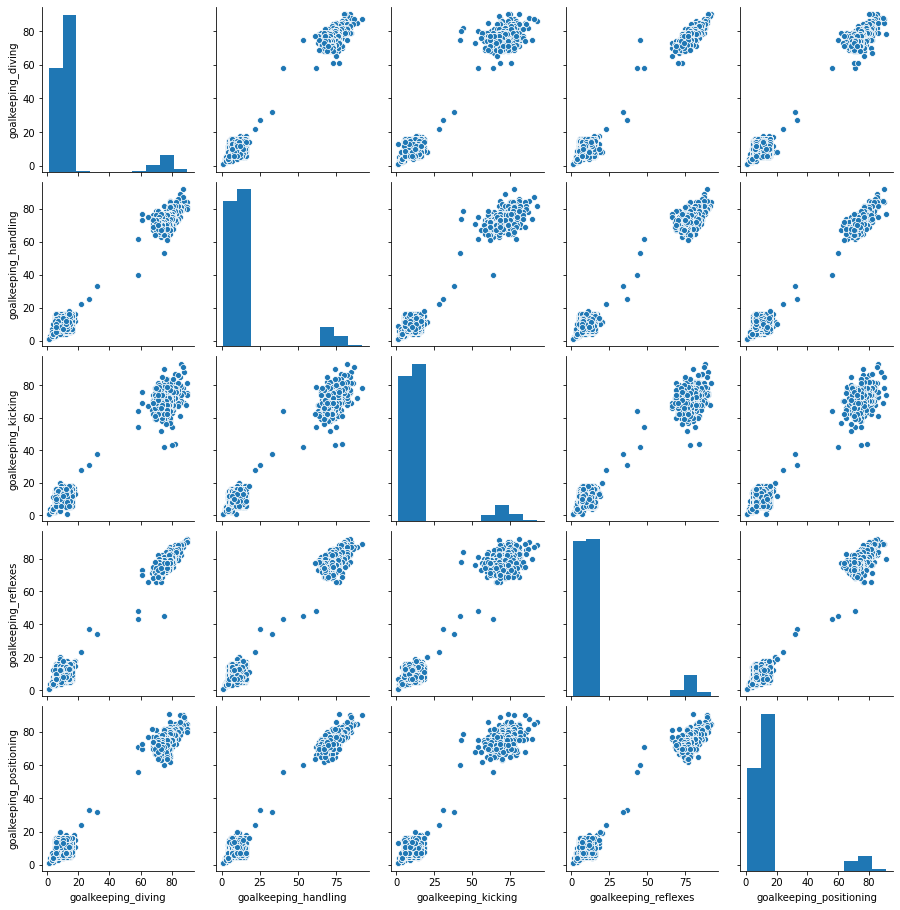

In [8]:
display('### Features relativas a un arquero', df[cols2keep[14:19]].describe())

plt.figure(figsize=(10,10))
sns.pairplot(df[cols2keep[14:19]])

A continuación se procede a analizar la correlación entre las features correspondientes al ataque de jugadores

'### Features relativas al ataque'

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
count         4756.000000          4756.000000                 4756.000000   
mean            58.254205            54.047729                   59.440706   
std             19.050531            20.475484                   18.234264   
min              6.000000             5.000000                    7.000000   
25%             49.000000            40.000000                   52.000000   
50%             65.000000            60.000000                   64.000000   
75%             72.000000            70.000000                   72.000000   
max             93.000000            95.000000                   93.000000   

       attacking_short_passing  attacking_volleys  
count              4756.000000        4756.000000  
mean                 67.692178          51.813919  
std                  13.736390          19.361427  
min                  11.000000           5.000000  
25%                  66.000000          38.000000  
50%                  71.000000          56.000000  
75%                  75.000000          67.000000  
max                  92.000000          90.000000

<Figure size 720x720 with 0 Axes>

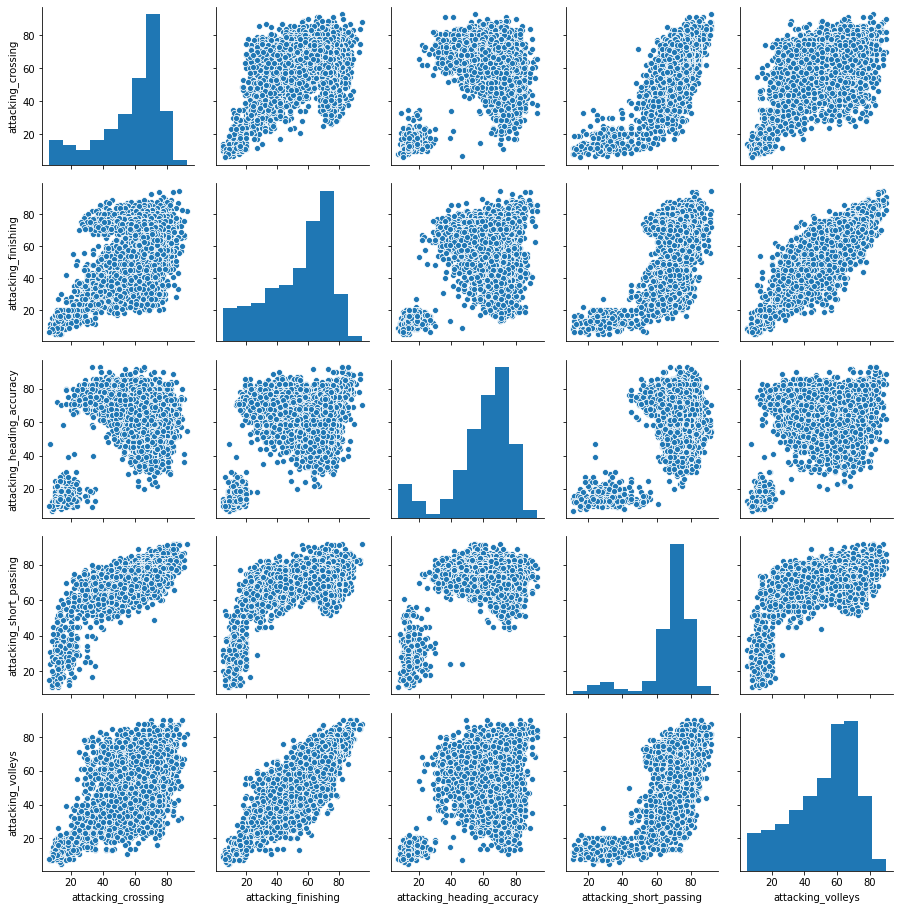

In [9]:
display('### Features relativas al ataque', df[cols2keep[19:24]].describe())

plt.figure(figsize=(10,10))
sns.pairplot(df[cols2keep[19:24]])

A continuación se procede a analizar la correlación entre las features correspondientes a las habilidades de los jugadores

'### Features relativas a habilidades'

skill_moves  skill_dribbling  skill_curve  skill_fk_accuracy  \
count  4756.000000      4756.000000  4756.000000        4756.000000   
mean      2.772288        64.313499    57.126156          51.134777   
std       0.872333        18.867436    19.539312          19.262865   
min       1.000000         7.000000     6.000000           4.000000   
25%       2.000000        60.000000    46.000000          37.000000   
50%       3.000000        71.000000    63.000000          54.000000   
75%       3.000000        76.000000    72.000000          67.000000   
max       5.000000        97.000000    94.000000          94.000000   

       skill_long_passing  skill_ball_control  
count         4756.000000         4756.000000  
mean            61.882044           67.678722  
std             14.411183           16.125422  
min              9.000000            5.000000  
25%             57.000000           66.000000  
50%             65.000000           72.000000  
75%             72.000000           76.000000  
max             92.000000           96.000000

<Figure size 720x720 with 0 Axes>

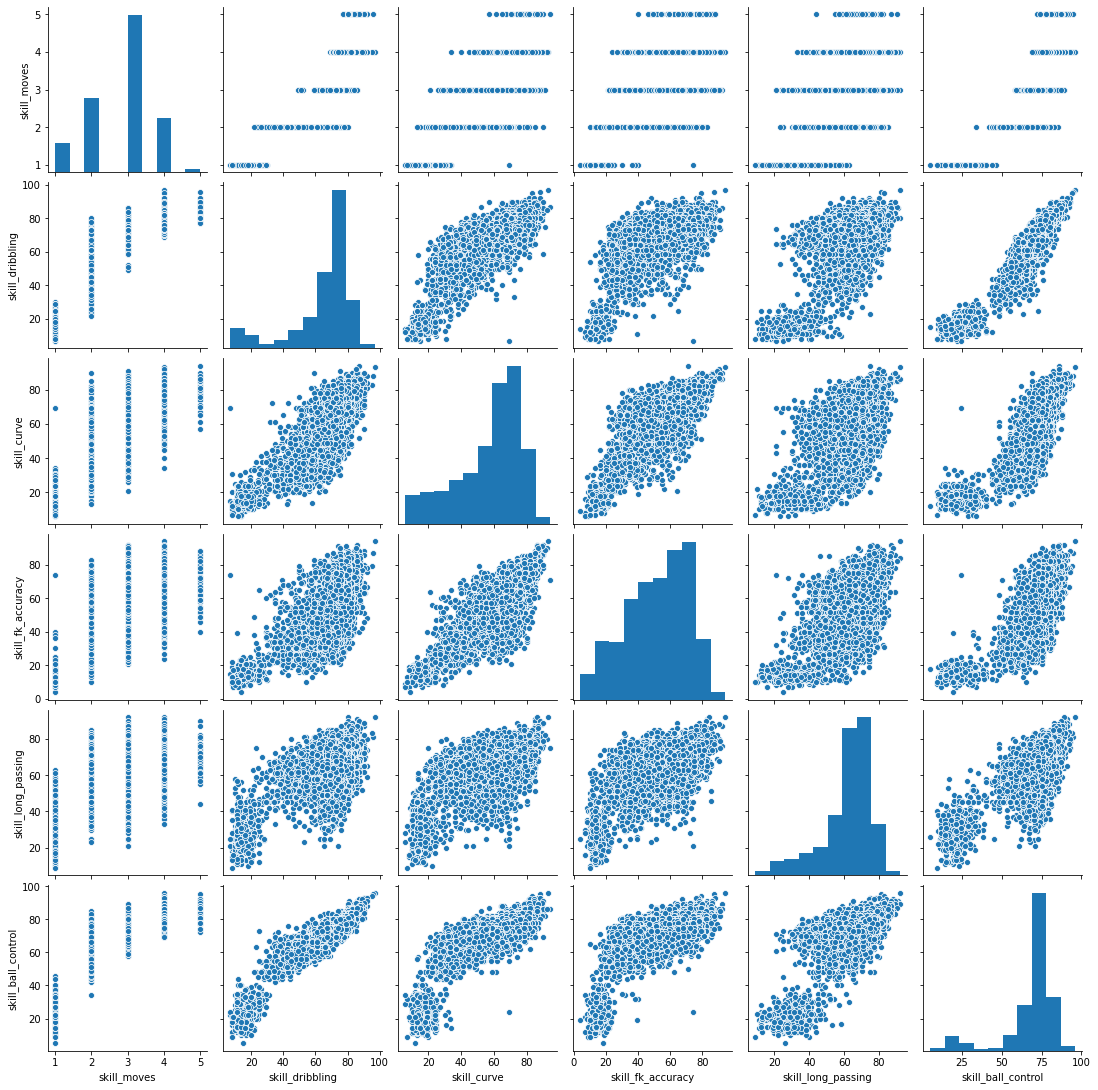

In [10]:
display('### Features relativas a habilidades', df[cols2keep[24:30]].describe())

plt.figure(figsize=(10,10))
sns.pairplot(df[cols2keep[24:30]])

A continuación se procede a analizar la correlación entre las features correspondientes a la movidlidad de los jugadores

'### Features relativas a movilidad'

movement_acceleration  movement_sprint_speed  movement_agility  \
count            4756.000000            4756.000000       4756.000000   
mean               67.445963              67.626577         67.705635   
std                14.555591              14.216908         14.247976   
min                15.000000              16.000000         14.000000   
25%                59.000000              60.000000         60.000000   
50%                69.000000              70.000000         70.000000   
75%                78.000000              77.000000         77.000000   
max                97.000000              96.000000         96.000000   

       movement_reactions  movement_balance  
count         4756.000000       4756.000000  
mean            71.818966         65.579268  
std              5.571127         14.527765  
min             54.000000         20.000000  
25%             68.000000         57.000000  
50%             72.000000         68.000000  
75%             75.000000         76.000000  
max             96.000000         96.000000

<Figure size 720x720 with 0 Axes>

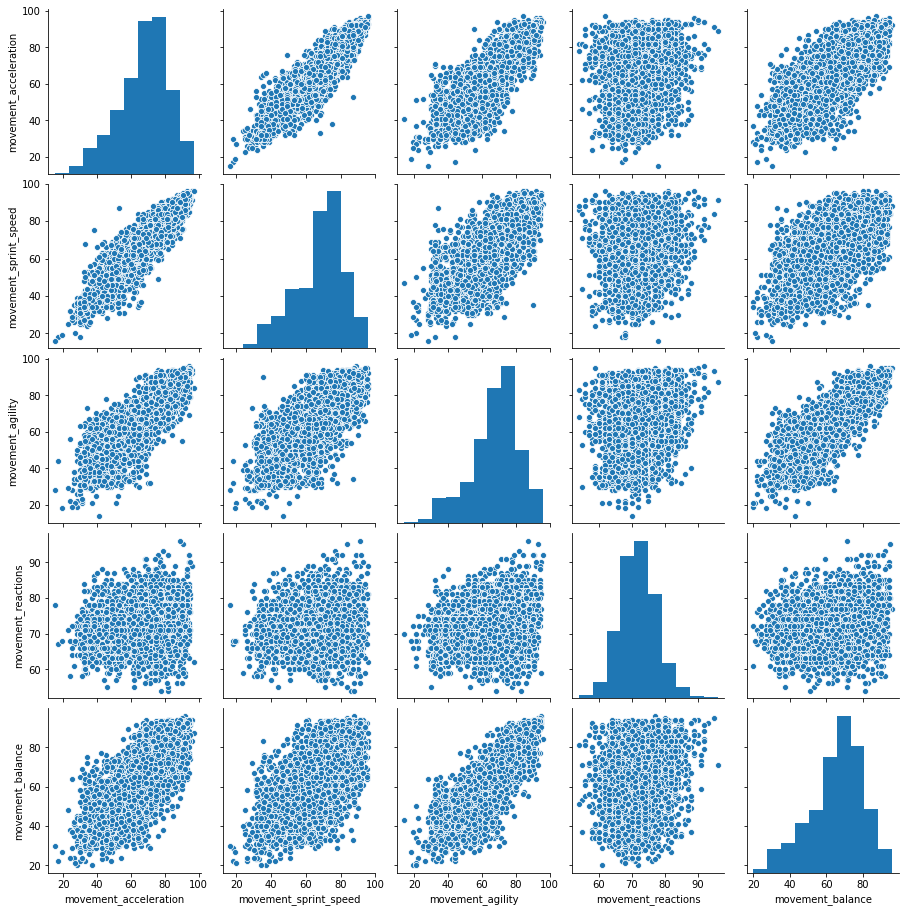

In [11]:
display('### Features relativas a movilidad', df[cols2keep[30:35]].describe())

plt.figure(figsize=(10,10))
sns.pairplot(df[cols2keep[30:35]])

A continuación se procede a analizar la correlación entre las features correspondientes a la potencia de los jugadores

'### Features relativas a potencia'

power_shot_power  power_jumping  power_stamina  power_strength  \
count       4756.000000    4756.000000    4756.000000     4756.000000   
mean          67.824432      68.627208      69.143398       69.861648   
std           11.516718      11.842802      14.877588       11.540401   
min           15.000000      29.000000      13.000000       26.000000   
25%           60.000000      62.000000      65.000000       63.000000   
50%           70.000000      70.000000      72.000000       71.000000   
75%           76.000000      77.000000      78.000000       78.000000   
max           95.000000      95.000000      97.000000       95.000000   

       power_long_shots  
count       4756.000000  
mean          56.986964  
std           19.780760  
min            5.000000  
25%           47.000000  
50%           64.000000  
75%           71.000000  
max           94.000000

<Figure size 720x720 with 0 Axes>

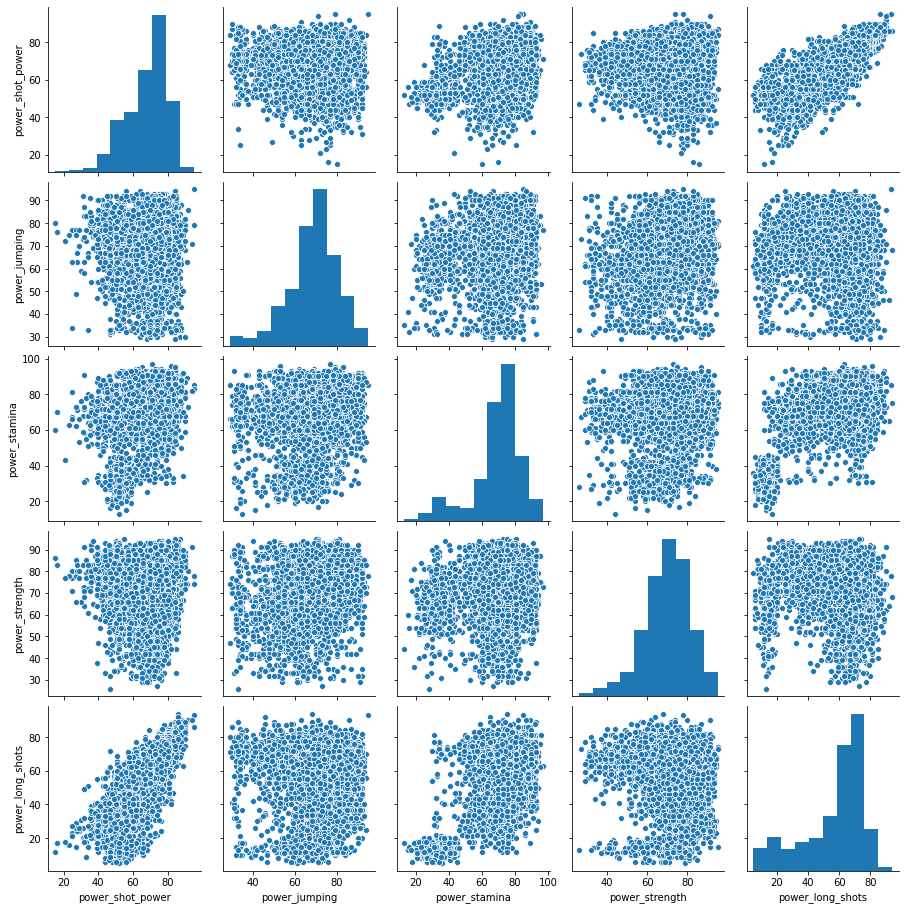

In [12]:
display('### Features relativas a potencia', df[cols2keep[35:40]].describe())

plt.figure(figsize=(10,10))
sns.pairplot(df[cols2keep[35:40]])

A continuación se procede a analizar la correlación entre las features correspondientes a las soft skills de los jugadores

'### Features relativas a soft skills'

mentality_aggression  mentality_interceptions  mentality_positioning  \
count           4756.000000              4756.000000            4756.000000   
mean              64.019975                54.118797              58.868797   
std               17.001287                22.009002              20.527451   
min               11.000000                 7.000000               3.000000   
25%               55.000000                33.000000              50.000000   
50%               69.000000                64.000000              67.000000   
75%               76.000000                73.000000              73.000000   
max               95.000000                92.000000              95.000000   

       mentality_vision  mentality_penalties  mentality_composure  
count       4756.000000          4756.000000          4756.000000  
mean          62.892136            55.383516            69.292893  
std           13.352943            16.522581             8.894486  
min           10.000000             9.000000            17.000000  
25%           56.000000            45.000000            65.000000  
50%           66.000000            59.000000            70.000000  
75%           73.000000            68.000000            75.000000  
max           94.000000            92.000000            96.000000

<Figure size 720x720 with 0 Axes>

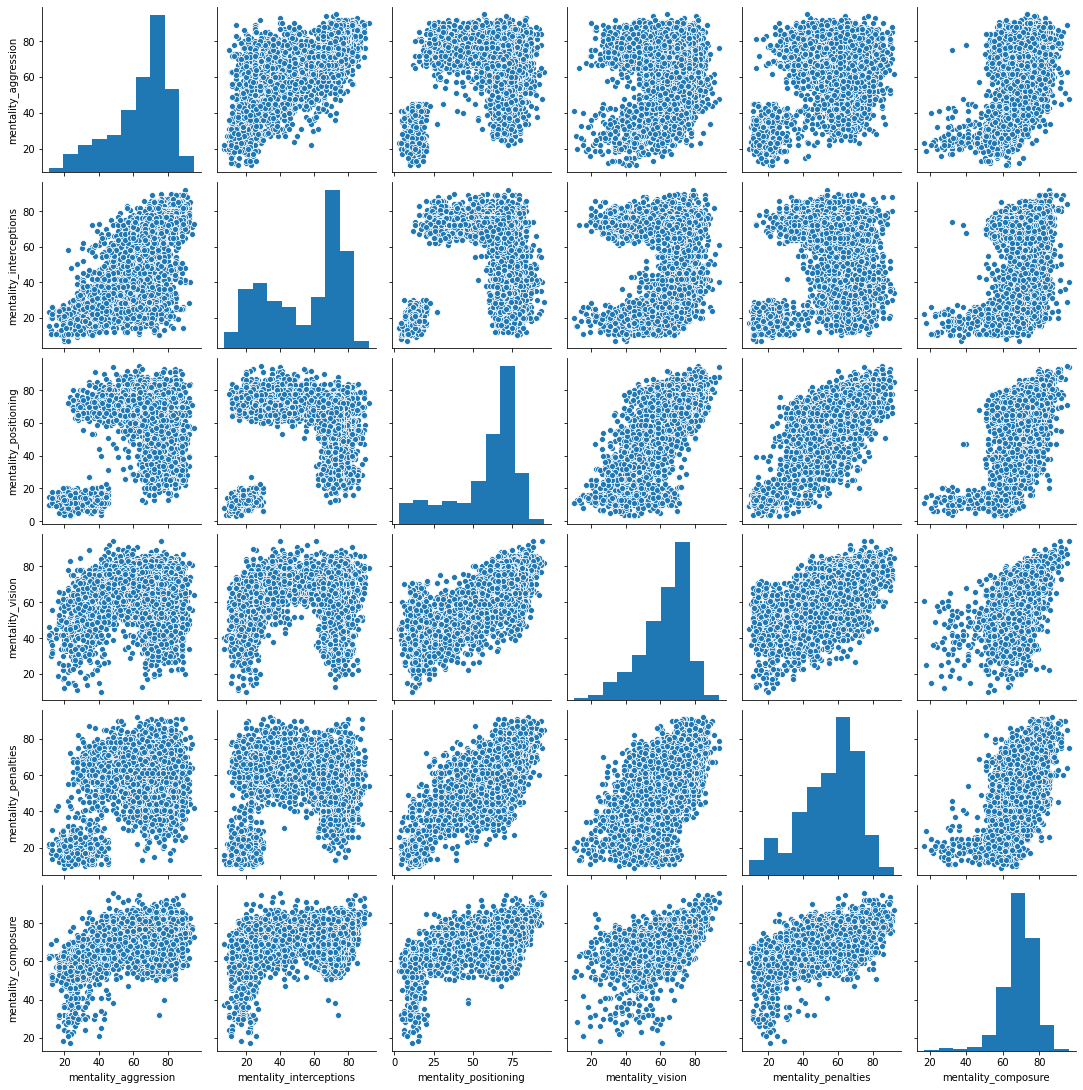

In [13]:
display('### Features relativas a soft skills', df[cols2keep[40:46]].describe())

plt.figure(figsize=(10,10))
sns.pairplot(df[cols2keep[40:46]])

A continuación se procede a analizar la correlación entre las features correspondientes a la defensa de los jugadores

'### Features relativas a defensa'

defending_marking  defending_standing_tackle  defending_sliding_tackle
count        4756.000000                4756.000000               4756.000000
mean           53.769554                  53.889193                 51.003995
std            21.555882                  23.414846                 23.553027
min             7.000000                   7.000000                  8.000000
25%            35.000000                  32.000000                 27.000000
50%            62.000000                  65.000000                 61.000000
75%            72.000000                  74.000000                 72.000000
max            94.000000                  92.000000                 90.000000

<Figure size 720x720 with 0 Axes>

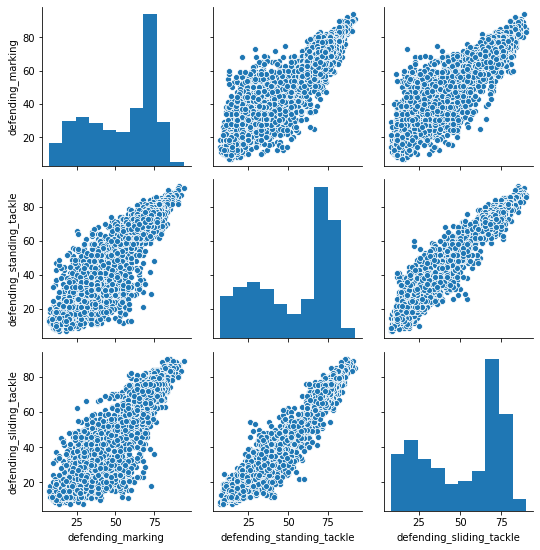

In [14]:
display('### Features relativas a defensa', df[cols2keep[46:49]].describe())

plt.figure(figsize=(10,10))
sns.pairplot(df[cols2keep[46:49]])

In [15]:
df.describe(include=[np.object])

short_name     club player_positions preferred_foot team_position
count           4756     4756             4756           4756          4756
unique          4630      500              395              2            30
top     J. Rodríguez  Chelsea               CB          Right           SUB
freq               6       30              663           3591          1540

Creación del jugador "Machine Gun" para utilizarlo de referencia

In [16]:
MachineGunDict=dict()
for col in cols2keep:
    MachineGunDict[col]=99
MachineGunDict['short_name'] = 'Machine Gun'
df=df.append(MachineGunDict,ignore_index=True)
df.tail()

short_name              club  height_cm  weight_kg  overall  \
4752  Túlio Sandoiro          CSA - AL        186         82       71   
4753       D. Guzman  Columbus Crew SC        178         79       71   
4754    R. Procházka    Viktoria Plzeň        182         77       71   
4755        L. Filip     FCSB (Steaua)        184         81       71   
4756     Machine Gun                99         99         99       99   

     player_positions preferred_foot  work_rate team_position  shooting  ...  \
4752               ST          Right          0           SUB      71.0  ...   
4753          CDM, CM          Right          1           SUB      60.0  ...   
4754          CDM, CM          Right          1           LDM      59.0  ...   
4755          CDM, CB          Right          1           CDM      49.0  ...   
4756               99             99         99            99      99.0  ...   

      power_long_shots  mentality_aggression  mentality_interceptions  \
4752                70                    60                       37   
4753                64                    83                       65   
4754                64                    71                       72   
4755                57                    73                       74   
4756                99                    99                       99   

      mentality_positioning  mentality_vision  mentality_penalties  \
4752                     65                66                   70   
4753                     65                68                   61   
4754                     56                65                   61   
4755                     57                59                   41   
4756                     99                99                   99   

      mentality_composure  defending_marking  defending_standing_tackle  \
4752                   71                 18                         33   
4753                   69                 69                         71   
4754                   69                 71                         73   
4755                   61                 65                         70   
4756                   99                 99                         99   

      defending_sliding_tackle  
4752                        36  
4753                        65  
4754                        72  
4755                        68  
4756                        99  

[5 rows x 49 columns]

Procedemos a mostrar el dataset de jugadores en un gráfico en base a features relativas a la mentalidad de los mismos, sólo teniendo en cuenta aquellos con un "overall" mayor a 85.

##Seleccionamos estas features ya que estan separadas naturalmente

En el gráfico a continuación ya se pueden visualizar dos conjuntos bien separados entre sí. Esto nos permite presuponer que los jugadores se dividen, en base a estas dos features y su correlación, en dos conjuntos bien demarcados.

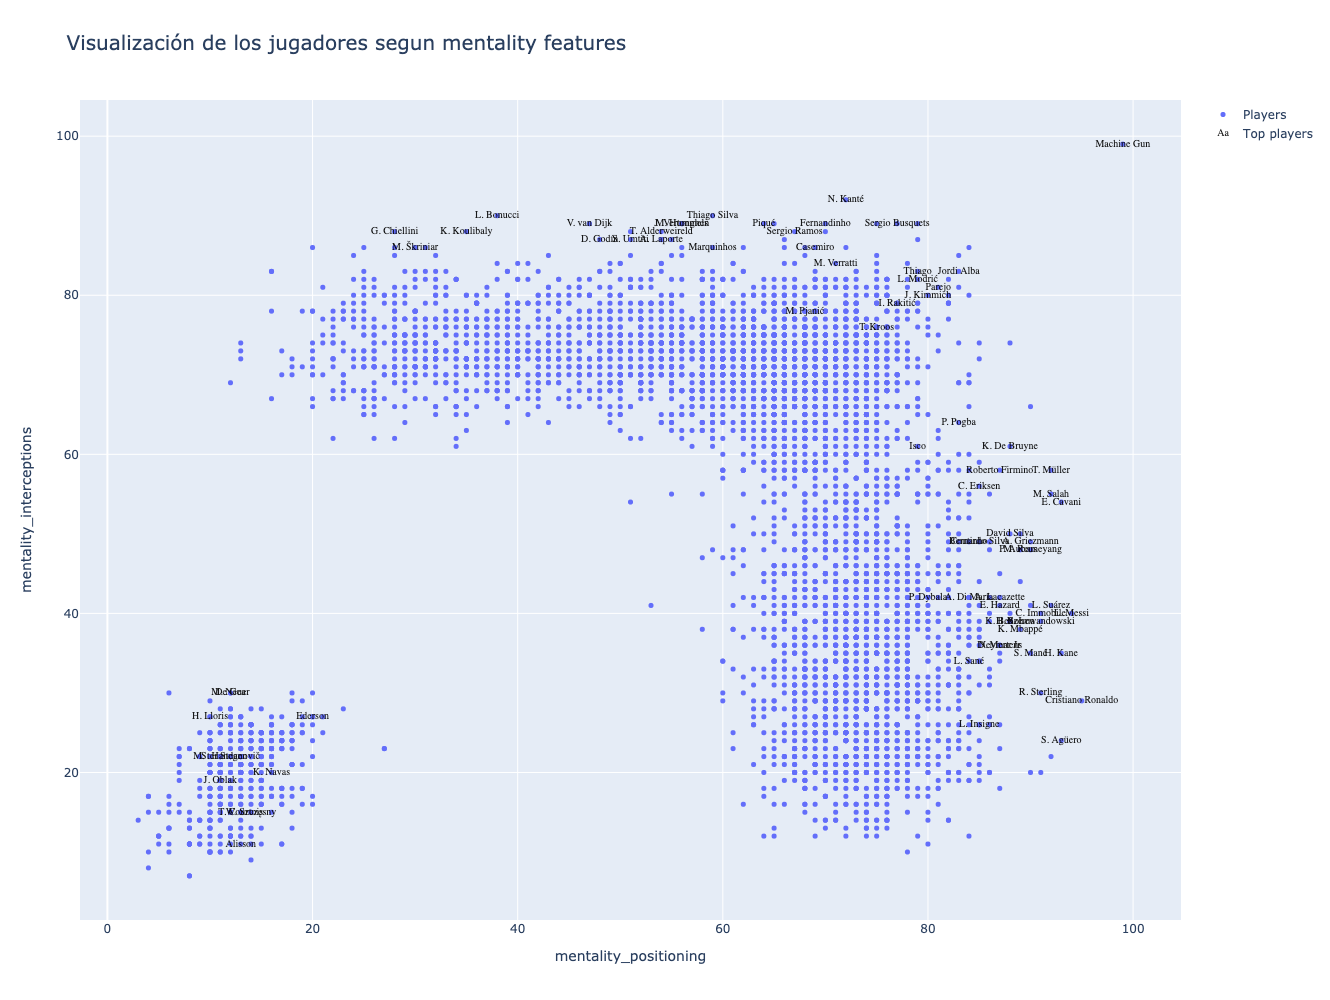

In [17]:
skill_1 = 'mentality_positioning'
skill_2 = 'mentality_interceptions'
bool_crack = df.overall>85

graf1 = go.Scatter(x=df[skill_1], 
                   y=df[skill_2],
                   name='Players',
                   text=df[['club', 'team_position']].apply(lambda x:f'{x.club} - {x.team_position}', axis=1),
                   mode='markers',
                   marker=dict(size=5))

crack =go.Scatter(x=df.loc[bool_crack,skill_1], 
                  y=df.loc[bool_crack,skill_2],
                  name='Top players',
                  text=df.loc[bool_crack,'short_name'],
                  textfont=dict(family='sans serif',size=10,color='black'),
                  opacity=0.9,
                  mode='text')

data=[graf1, crack]

layout = go.Layout(title="Visualización de los jugadores segun mentality features", 
                   titlefont=dict(size=20),
                   xaxis=dict(title=skill_1),
                   yaxis=dict(title=skill_2),
                   autosize=False,
                   width=1000,
                   height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Ahora, manteniendo la correlación entre features al igual que el gráfico anterior, se procede a marcar a el jugador ficticio de referencia "Machine Gun", a un jugador seleccionado de forma manual (en este caso Leonel Messi) y a separar a el resto de los jugadores entre "cracks" y "no cracks" dependiendo del valor de su "overall". Aquellos jugadores con un "overall" mayor a 85 son considerados cracks.

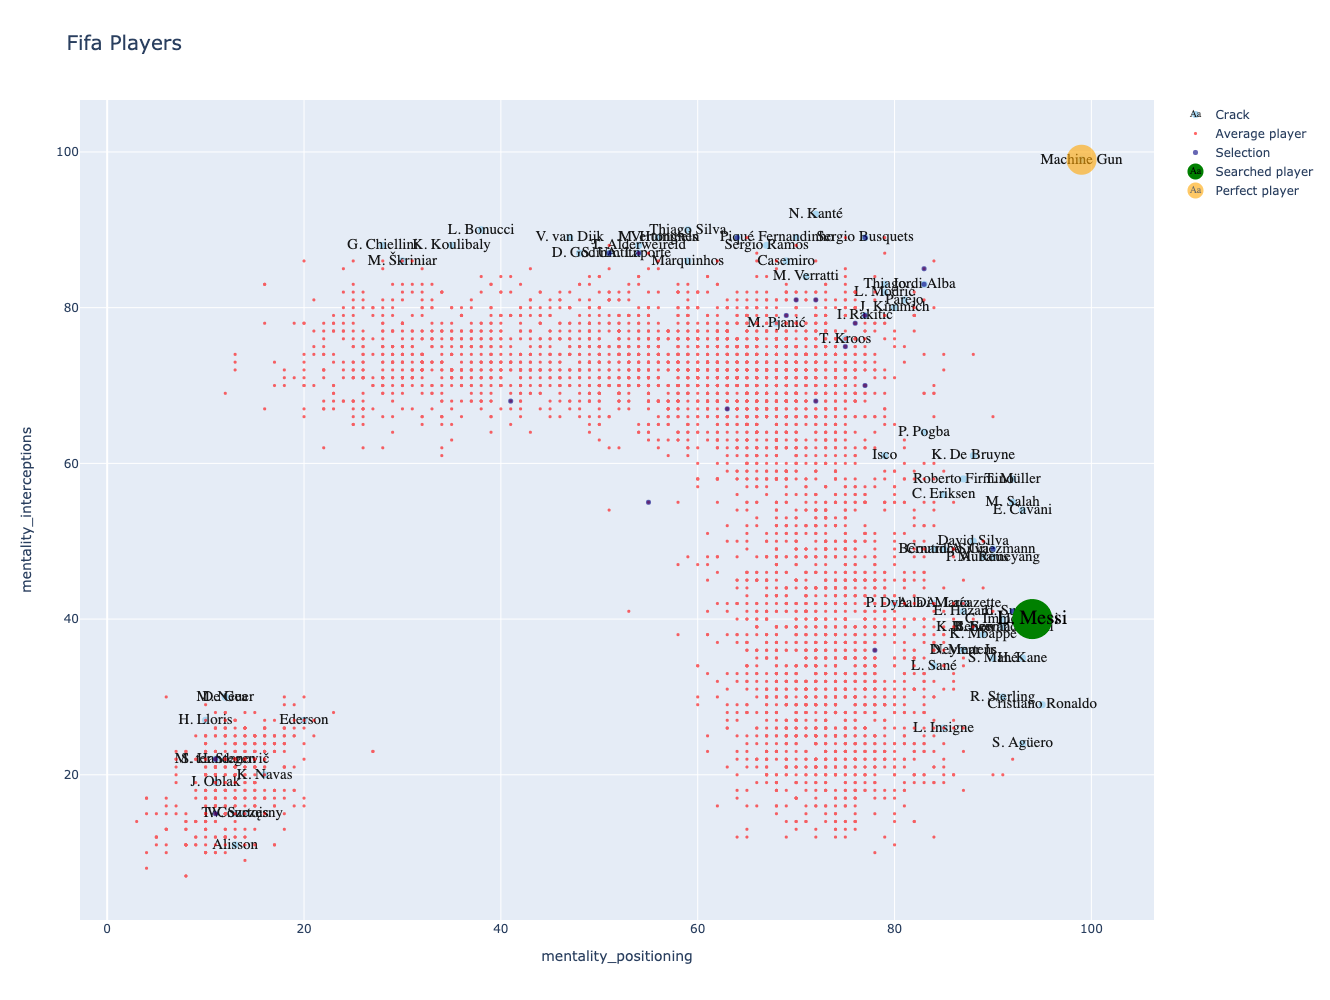

In [18]:
# Gráfico 2
# Elegimos un jugador
recherche_joueur = df['short_name']=='L. Messi' 


bool_crack = df['overall']>85
bool_elecc = df['club']=='FC Barcelona' 
bool_no_crack = df['overall']<86
bool_machinegun = df['short_name']=='Machine Gun'

#Elegir dos skills
skill_1 = 'mentality_positioning'
skill_2 = 'mentality_interceptions'

palette=['navy','red','#A2D5F2','orange','green','pink']  

n_crack = go.Scatter(x=df.loc[bool_crack,skill_1], 
                     y=df.loc[bool_crack,skill_2],
                     name='Crack',
                     text=df.loc[bool_crack,'short_name'],
                     textfont=dict(family='sans serif',size=15,color='black'),
                     opacity=0.9,
                     marker=dict(color=palette[2],size=7),
                     mode='markers+text')

n_no_crack = go.Scatter(x=df.loc[bool_no_crack,skill_1],
                        y=df.loc[bool_no_crack,skill_2],
                        name='Average player',
                        text=df.loc[bool_no_crack,'short_name'],
                        opacity=0.6,
                        marker=dict(color=palette[1],size=3),
                        mode='markers')

n_elecc = go.Scatter(x=df.loc[bool_elecc,skill_1],
                    y=df.loc[bool_elecc,skill_2],
                    name='Selection',
                    text=df.loc[bool_elecc,'short_name'],
                    opacity=0.6,
                    marker=dict(color=palette[0],size=5),
                    mode='markers')

n_machinegun = go.Scatter(x=df.loc[bool_machinegun,skill_1],
                          y=df.loc[bool_machinegun,skill_2],
                          name='Perfect player',
                          textfont=dict(family='sans serif',size=20,color='black'),
                          opacity=0.6,
                          marker=dict(color=palette[3],size=30),
                          mode='markers+text')


joueur_recherche = go.Scatter(x=df.loc[recherche_joueur,skill_1],
                              y=df.loc[recherche_joueur,skill_2],
                              name='Searched player',
                              text=df.loc[recherche_joueur,'short_name'],
                              textfont=dict(family='sans serif',size=20,color='black'),
                              opacity=1,
                              marker=dict(color=palette[4],size=40),
                              mode='markers+text')

data = [n_crack, n_no_crack, n_elecc, joueur_recherche, n_machinegun]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                   xaxis=dict(title=skill_1),
                   yaxis=dict(title=skill_2),
                   autosize=False,
                   width=1000,
                   height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)